In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Cargar el archivo CSV subido
df = pd.read_csv("housing.csv")
#del df['ocean_proximity']
df = pd.get_dummies(df)
df = df.fillna(df.mean())

X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

nombres_limpios = [col.replace('<', '').replace('>', '').replace('[', '').replace(']', '') for col in X.columns]
X.columns = nombres_limpios

### Escalar datos y hacer PCA

In [3]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA())
])
pipeline.fit(X)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA())])

In [5]:
# Obten el objeto de PCA
objeto_pca = pipeline.named_steps['pca']

In [8]:
X_pca = pipeline.transform(X)
X_componentes = pd.DataFrame(X_pca, columns=[f'PCA {i+1}' for i in range(X_pca.shape[1])])
X_componentes

,PCA 1,PCA 2,PCA 3,PCA 4,PCA 5,PCA 6,PCA 7,PCA 8,PCA 9,PCA 10,PCA 11,PCA 12,PCA 13
0,-2.375111,1.858058,-2.789762,0.099758,1.382388,0.373647,1.788786,-0.024894,0.175938,-0.250550,0.145763,-0.067212,-2.839656e-15
1,2.617723,2.714887,-2.781672,0.104062,1.572170,0.445566,1.594817,-0.484008,-0.354827,0.039535,-0.027019,0.266951,9.351027e-16
2,-2.257997,1.938945,-2.938880,0.216968,0.472146,0.173484,1.796909,0.459729,0.099150,-0.033039,0.104118,-0.048443,-1.951477e-15
3,-2.210764,2.030104,-2.689386,0.237120,-0.216221,0.005836,1.503468,0.155376,0.056837,-0.034649,0.077560,-0.038663,-1.951477e-15
4,-2.073292,2.149514,-2.420998,0.262479,-0.953494,-0.171632,1.202670,-0.152623,-0.101422,0.177669,0.009693,0.009757,-1.285343e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-1.154527,2.099671,1.584531,-0.564314,-0.335252,-0.097306,-0.718325,0.055053,-0.122448,0.099142,0.395915,0.137862,-3.006189e-15
20636,-1.961548,1.937474,1.691384,-0.673679,0.509235,0.085962,-0.694854,-0.281484,-0.018039,0.067396,0.374592,0.090721,-3.339256e-15
20637,-0.559456,2.212189,1.701540,-0.615767,-0.011015,-0.025403,-0.828813,-0.308924,-0.200370,0.077075,0.320970,0.138308,-2.562100e-15
20638,-0.969095,2.162271,1.677224,-0.624498,0.084631,-0.005064,-0.808155,-0.270878,-0.238012,0.069520,0.294299,0.108453,-2.562100e-15


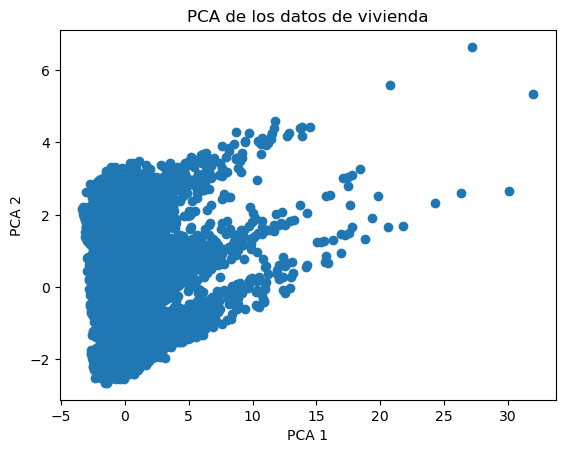

In [11]:
plt.scatter(X_componentes['PCA 1'], X_componentes['PCA 2'])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA de los datos de vivienda')
plt.show()

### Varianza explicada

Si la primera componente principal se obtiene con el eigenvalor que máximiza la varianza.

La varianza explicada por cada componente principal 

$$varianza_i = \frac{Eigenvalor_i}{\Sigma{Eigenvalores}}$$


In [ ]:
# Porcentaje de varianza que explican los componentes principales

objeto_pca.explained_variance_ratio_[0],objeto_pca.explained_variance_ratio_[1]

(0.30154289877695334, 0.1973865652732012)

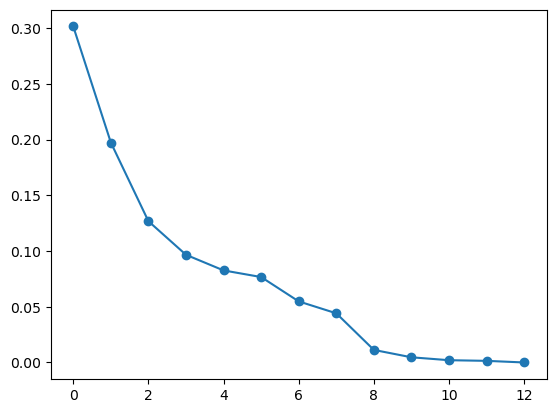

In [15]:
plt.plot(objeto_pca.explained_variance_ratio_, marker='o');

### Entendiendo primera componente

In [21]:
# Entender PCA 1

componente1 = pd.DataFrame({
    'features': X.columns,
    'pesos': objeto_pca.components_[0]
})
componente1

,features,pesos
0,longitude,0.101538
1,latitude,-0.099569
2,housing_median_age,-0.220563
3,total_rooms,0.478316
4,total_bedrooms,0.484269
5,population,0.469222
6,households,0.486598
7,median_income,0.048330
8,ocean_proximity_1H OCEAN,0.057847
9,ocean_proximity_INLAND,-0.012784


In [22]:
componente2 = pd.DataFrame({
    'features': X.columns,
    'pesos': objeto_pca.components_[1]
})
componente2

,features,pesos
0,longitude,-0.515239
1,latitude,0.563595
2,housing_median_age,-0.026872
3,total_rooms,0.100905
4,total_bedrooms,0.090788
5,population,0.052088
6,households,0.085387
7,median_income,-0.088896
8,ocean_proximity_1H OCEAN,-0.435594
9,ocean_proximity_INLAND,0.290002


### Entendiendo segunda componente

### Obtener las componentes principales

pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

In [114]:

# Transformar los datos

# Crear DataFrame con nombres de columnas


### Visualizar componentes principales

## Modelos de datos

### Primero con todos los features

In [23]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

model = XGBRegressor().fit(X, y)
predicciones = model.predict(X)
r2_score(y, predicciones)

0.9326267577509099

### Ahora con las componentes principales

In [24]:
x_pc12 = X_componentes[['PCA 1', 'PCA 2']]
model = XGBRegressor().fit(x_pc12, y)
predicciones = model.predict(x_pc12)
r2_score(y, predicciones)

0.3401837086574726

### Ahora solo con las primeras 3 componentes

In [25]:
x_pc12 = X_componentes[['PCA 1', 'PCA 2', 'PCA 3', 'PCA 4']]
model = XGBRegressor().fit(x_pc12, y)
predicciones = model.predict(x_pc12)
r2_score(y, predicciones)

0.7994365384895754

In [26]:
model = XGBRegressor().fit(X_componentes, y)
predicciones = model.predict(X_componentes)
r2_score(y, predicciones)

0.9185257171201562

In [28]:
importancias = pd.DataFrame({
    'features': X_componentes.columns,
    'importancia': model.feature_importances_
}).sort_values('importancia', ascending=False)

In [29]:
x_pca = X_componentes[['PCA 13', 'PCA 6', 'PCA 3']]
model = XGBRegressor().fit(x_pca, y)
predicciones = model.predict(x_pca)
r2_score(y, predicciones)

0.7474454895039776

### Conclusión: a medida que agregamos más componentes aumenta el poder predictivo pero se pierde el objetivo inicial que es tener menos dimensiones

### Clustering + PCA

In [3]:
from sklearn.cluster import KMeans


